In [48]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dbs = pd.read_csv("dbs_7y.csv")
dbs = dbs.set_index("Date")
uob = pd.read_csv("uob_7y.csv")
uob = uob.set_index("Date")

In [ ]:
# Prepare the data
dbs_prices = dbs['Close'].values.reshape(-1, 1)
uob_prices = uob['Close'].values.reshape(-1, 1)
# Align the data
common_index = dbs.index.intersection(uob.index)
dbs_prices = dbs_prices[np.isin(dbs.index, common_index)].flatten()
uob_prices = uob_prices[np.isin(uob.index, common_index)].flatten()
polynomial = np.polyfit(x=dbs_prices, y=uob_prices, deg=1)
print('UOB = %.9f * DBS + %.9f' % (polynomial[0], polynomial[1]))

UOB = 1.503825291 * DBS + 4.647724343


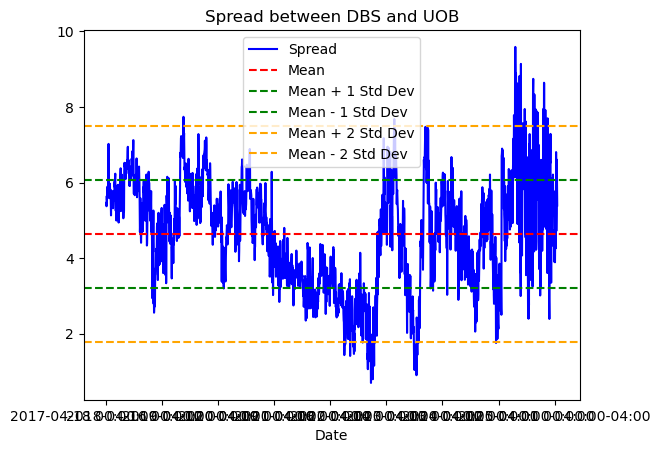

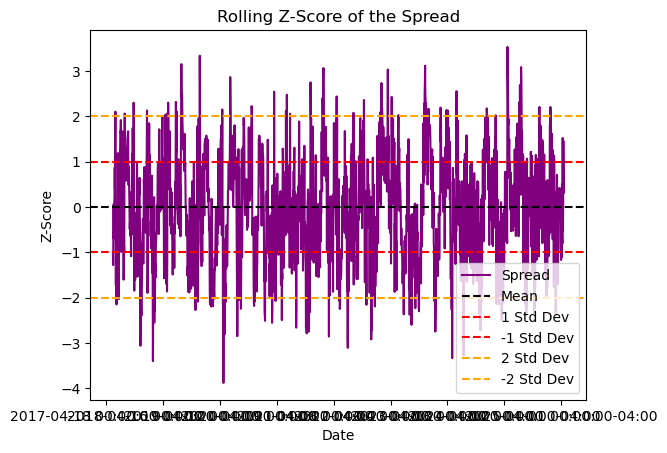

In [80]:
spread = pd.DataFrame(uob_prices - dbs_prices * polynomial[0], index=common_index, columns=['Spread'])

mean = spread.mean().iloc[0]
std = spread.std().iloc[0]

#
spread.plot(label='Spread', color='blue')
#plot mean and std deviation lines
plt.axhline(mean, color='red', linestyle='--', label='Mean')
plt.axhline(mean + std, color='green', linestyle='--', label='Mean + 1 Std Dev')
plt.axhline(mean - std, color='green', linestyle='--', label='Mean - 1 Std Dev')
plt.axhline(mean + 2 * std, color='orange', linestyle='--', label='Mean + 2 Std Dev')
plt.axhline(mean - 2 * std, color='orange', linestyle='--', label='Mean - 2 Std Dev')

plt.legend()
plt.title('Spread between DBS and UOB')
plt.xlabel('Date')

plt.show()

# Calculate z-score

# Calculate rolling z-score
window = 30  # rolling window size
rolling_mean = spread.rolling(window).mean()
rolling_std = spread.rolling(window).std()
rolling_z_score = (spread - rolling_mean) / rolling_std

rolling_z_score.plot(label='Rolling Z-Score', color='purple')
plt.axhline(0, color='black', linestyle='--', label='Mean')
plt.axhline(1, color='red', linestyle='--', label='1 Std Dev')
plt.axhline(-1, color='red', linestyle='--', label='-1 Std Dev')

plt.axhline(2, color='orange', linestyle='--', label='2 Std Dev')
plt.axhline(-2, color='orange', linestyle='--', label='-2 Std Dev')

plt.legend()
plt.title('Rolling Z-Score of the Spread')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.show()